In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [3]:
df = pd.read_csv("./Wine.csv")
df.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [6]:
X = df.drop(columns="Customer_Segment")
y = df["Customer_Segment"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=614)

print(X_train.shape)

(142, 13)


In [7]:
X_test.shape

(36, 13)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



<Axes: >

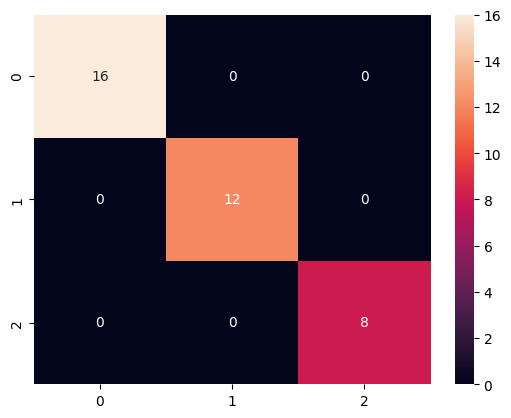

In [8]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [9]:
clf.coef_

array([[ 0.83407006,  0.21423658,  0.3135278 , -0.67100169,  0.07113397,
         0.29939366,  0.6358146 , -0.29384921,  0.091529  ,  0.20468802,
         0.21731315,  0.69531482,  0.99546772],
       [-0.98927269, -0.4420083 , -0.72553085,  0.43005564, -0.09699415,
        -0.0737876 ,  0.33877874,  0.26145633,  0.27519143, -1.0146151 ,
         0.57206291,  0.07244469, -1.10034926],
       [ 0.15520263,  0.22777172,  0.41200305,  0.24094605,  0.02586018,
        -0.22560606, -0.97459334,  0.03239288, -0.36672043,  0.80992707,
        -0.78937606, -0.76775951,  0.10488154]])

In [11]:
clf.coef_.shape

(3, 13)

In [12]:
clf.intercept_

array([ 0.314914  ,  0.68827217, -1.00318616])

-------
PCA

In [13]:
from sklearn.decomposition import PCA

# 13 -> 2
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Varianza explicada: {pca.explained_variance_ratio_.round(4)}, Total: {pca.explained_variance_ratio_.sum().round(4)}")

Varianza explicada: [0.3535 0.1935], Total: 0.547


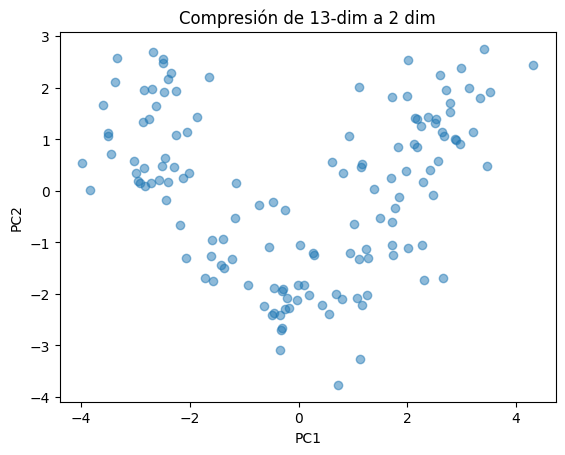

In [14]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"Compresión de 13-dim a 2 dim")
plt.show()

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        16
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



<Axes: >

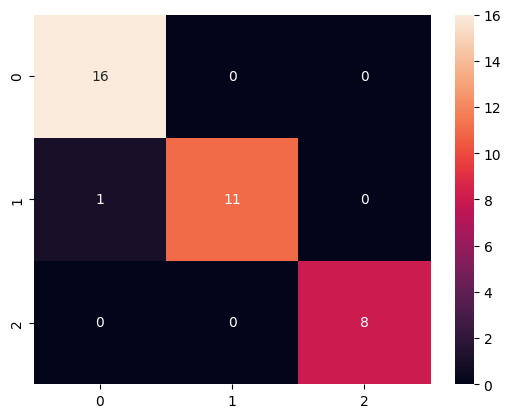

In [15]:
clf = LogisticRegression()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [16]:
clf.coef_

array([[ 1.19982692,  0.82716326],
       [ 0.19208823, -1.7637218 ],
       [-1.39191515,  0.93655854]])

In [17]:
clf.intercept_

array([ 0.04276204,  0.97219094, -1.01495298])

C:\Users\07020\AppData\Local\Temp\ipykernel_13132\3547533052.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_data[y_data==j, 0], X_data[y_data==j, 1],


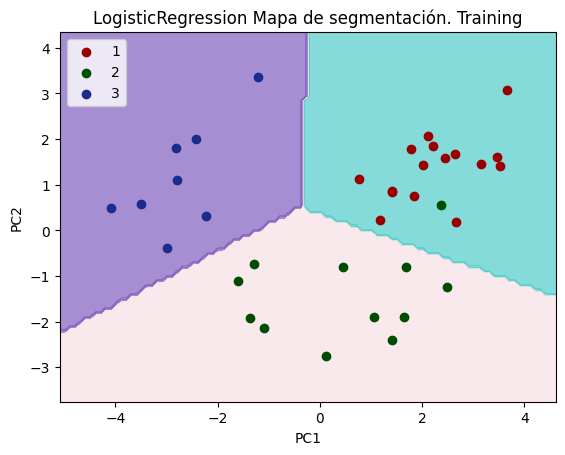

In [ ]:
from matplotlib.colors import ListedColormap


def segmentation_map(X_data, y_data, dset="Training"):
    # Crear grilla de datos
    xx, yy = np.meshgrid(np.arange(X_data[:, 0].min()-1, X_data[:, 0].max()+1, 0.1),
                         np.arange(X_data[:, 1].min()-1, X_data[:, 1].max()+1, 0.1))
    
    plt.contourf(xx, yy, clf.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape),
                 alpha=0.7, cmap=ListedColormap(("#52cdca", "#f9e1e4", "#805fc0")))
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    for i, j in enumerate(np.unique(y_data)):
        plt.scatter(X_data[y_data==j, 0], X_data[y_data==j, 1],
                    c=ListedColormap(("#990000", "#004d00", "#1b2c8f"))(i),
                    label=j)
    
    plt.title(f"{clf.__class__.__name__} Mapa de segmentación. {dset}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.show()
    

segmentation_map(X_test_pca, y_test)

C:\Users\07020\AppData\Local\Temp\ipykernel_13132\3547533052.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_data[y_data==j, 0], X_data[y_data==j, 1],


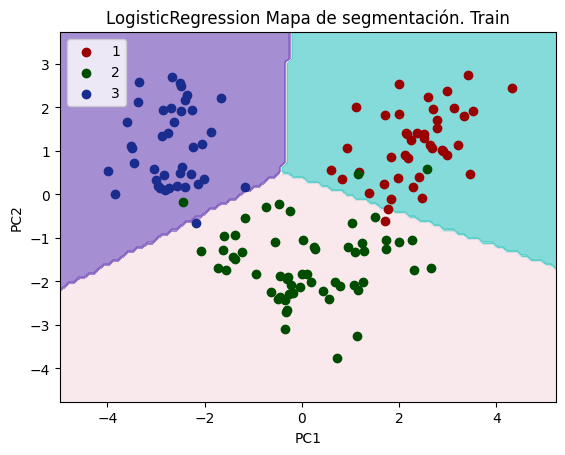

In [25]:
segmentation_map(X_train_pca, y_train, "Train")

------------------
## K-NN

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        16
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



<Axes: >

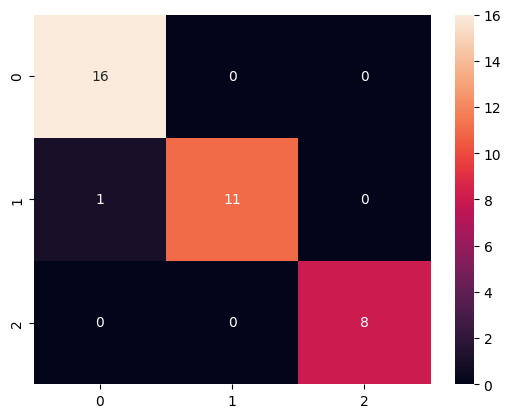

In [26]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

C:\Users\07020\AppData\Local\Temp\ipykernel_13132\3547533052.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_data[y_data==j, 0], X_data[y_data==j, 1],


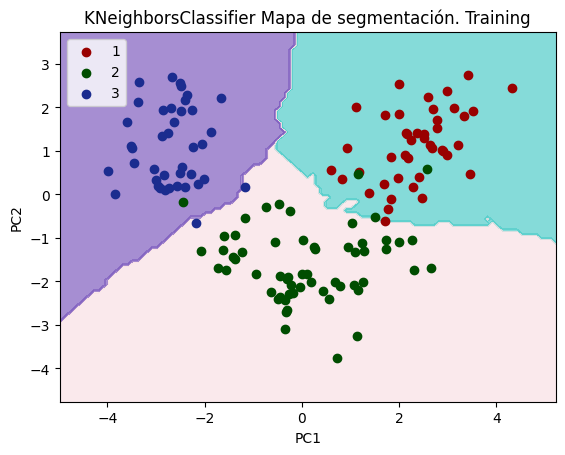

In [27]:
segmentation_map(X_train_pca, y_train)

C:\Users\07020\AppData\Local\Temp\ipykernel_13132\3547533052.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_data[y_data==j, 0], X_data[y_data==j, 1],


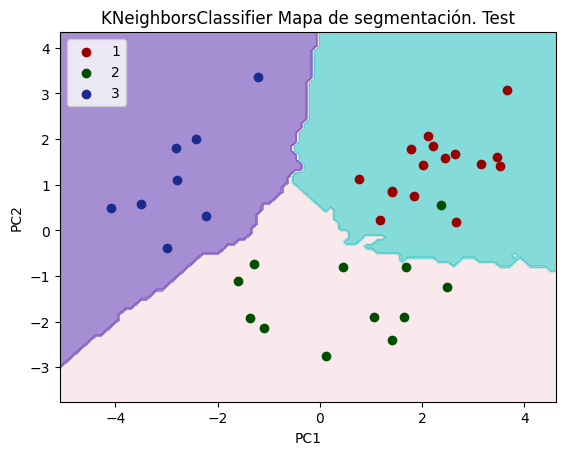

In [28]:
segmentation_map(X_test_pca, y_test, "Test")